<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Александр! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#LGBMRegressor" data-toc-modified-id="LGBMRegressor-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>LGBMRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split, cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{: .2f}'.format)

plt.style.use('seaborn-ticks')
sns.set(rc = {'figure.figsize': (16, 4), 'axes.edgecolor': 'black', 'axes.facecolor': '#f4f4f4', 'grid.color': '#ccc', 'grid.linestyle': ':'})
%config InlineBackend.figure_format = 'retina'

In [3]:
SEED = 12345

Загрузим файл с исходными данными:

In [4]:
try:
    df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
except FileNotFoundError:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что время сразу в индексе!</font>

Выведем несколько строк для ознакомления:

In [5]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Выведем основные описательные статистики временного ряда:

In [6]:
df.describe()

,num_orders
count,26496.00
mean,14.07
std,9.21
min,0.00
25%,8.00
50%,13.00
75%,19.00
max,119.00


По отсутствию отрицательных значений целевого признака можно судить о корректности данных.

Проверим налиичие пропусков и дубликатов в индексах: 

In [7]:
print('Количество пропусков:', df['num_orders'].isna().sum())

Количество пропусков: 0


In [8]:
print('Количество дубликатов:', df.index.duplicated().sum())

Количество дубликатов: 0


Временной интервал в исходных данных равен 10-ти минутам, а горизонт прогнозирования — 1 час.  
Выполним ресемплирование данных, аггрегируя суммы значений. Предворительно проверим хронологисеский порядок наблюдений:

In [9]:
if not df.index.is_monotonic:
    df = df.sort_index()

In [10]:
df = df.resample('1H').sum()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Ресемплирование по часу выполнено верно. Супер, что значения просуммированы, это проще интерпретируется, чем использование других агрегационных функций.</font>

In [11]:
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

## Анализ

In [12]:
print(
    'Период наблюдений:',
    df.index.min(), '—', df.index.max(),
    '({} мес.)'.format(round((df.index.max() - df.index.min()).days / 30), 0))

Период наблюдений: 2018-03-01 00:00:00 — 2018-08-31 23:00:00 (6 мес.)


Декомпозируем временной ряд и проанализируем тренд и сезонность:

In [13]:
decomposed = seasonal_decompose(df)

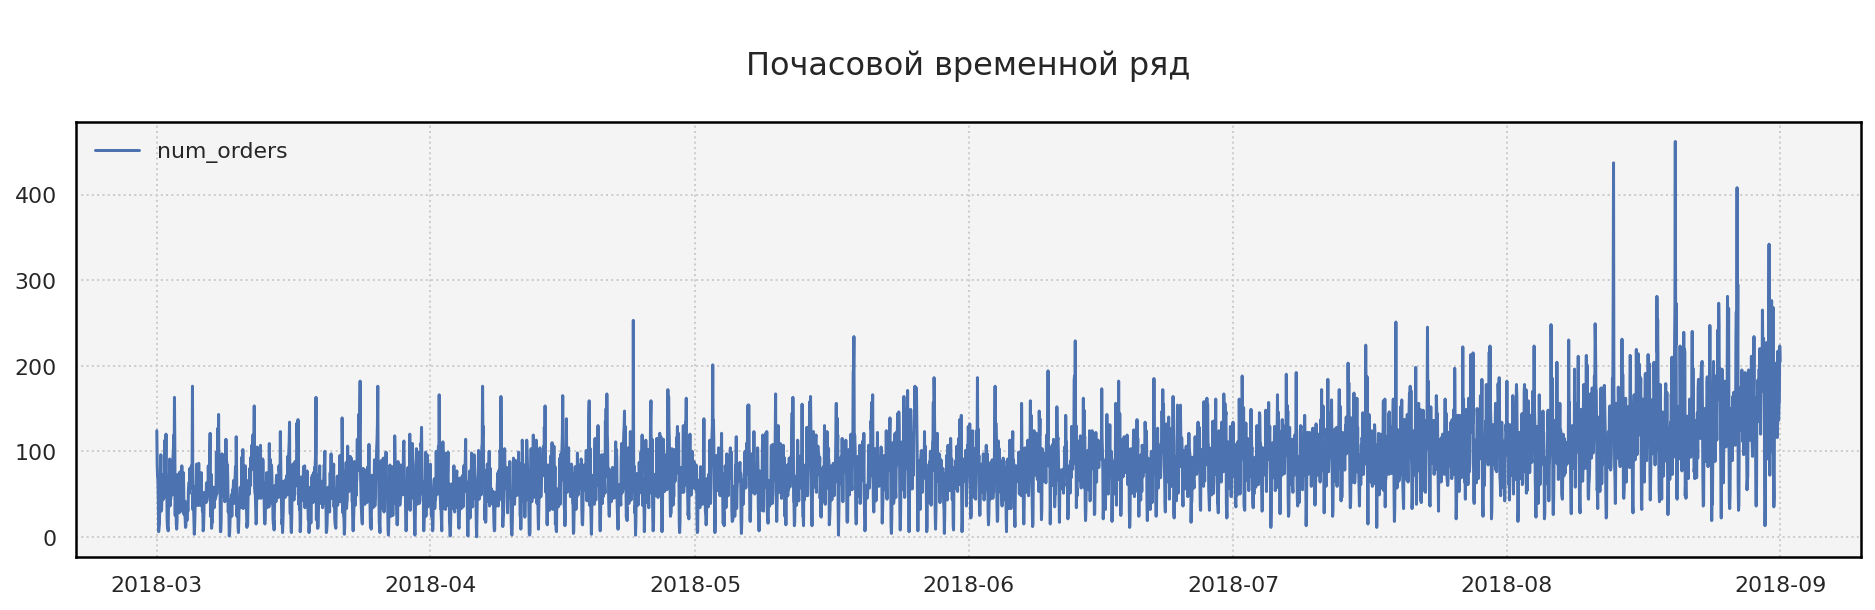

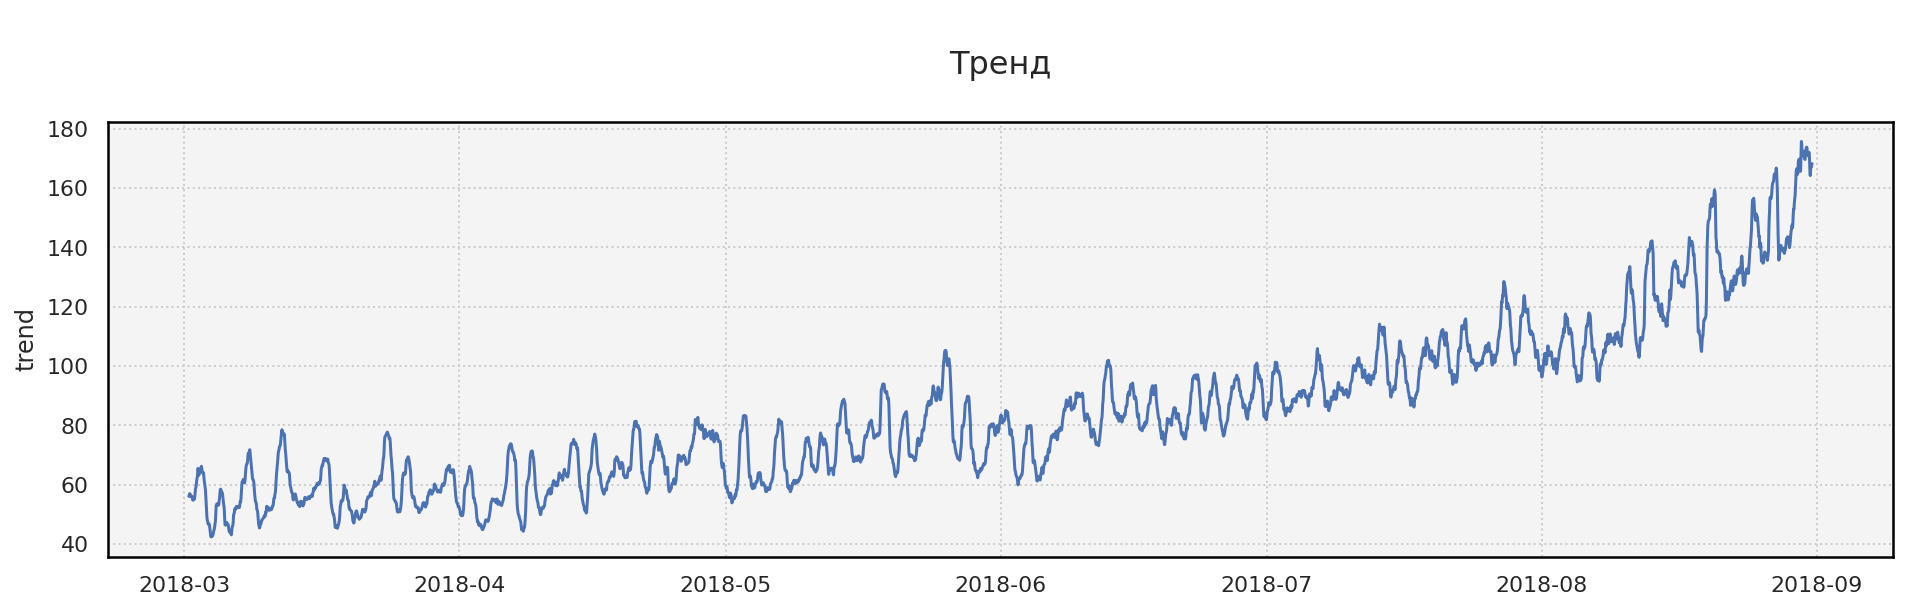

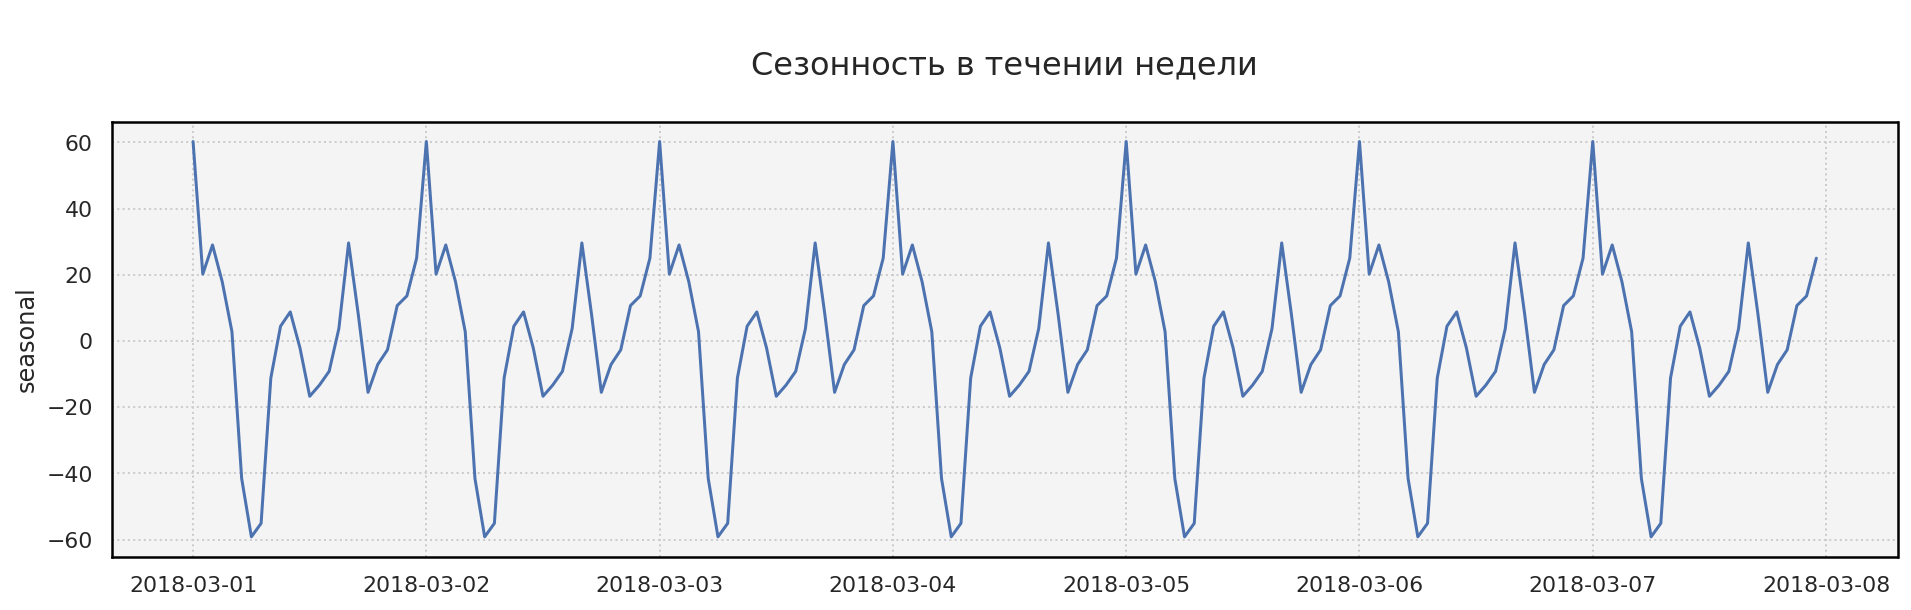

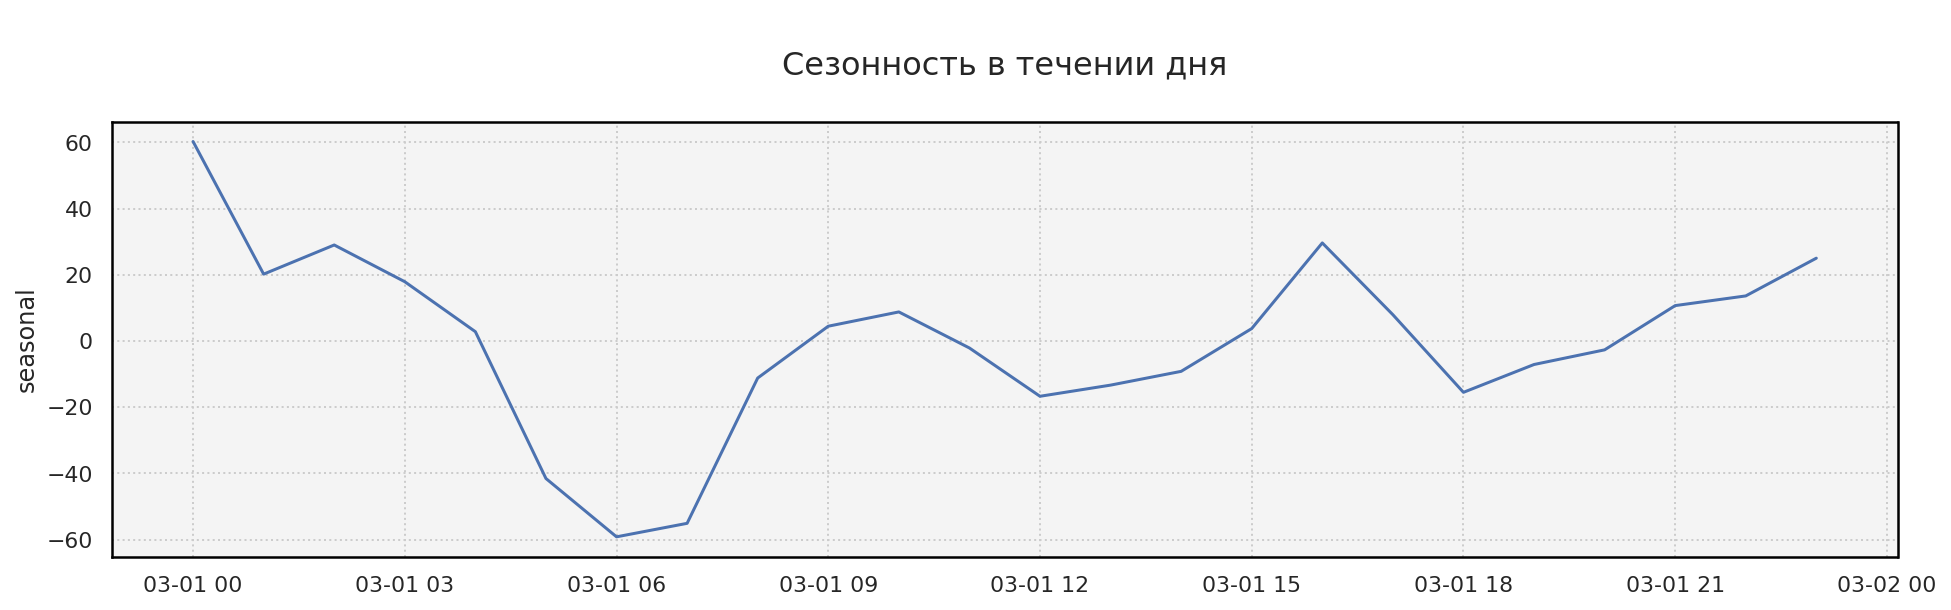

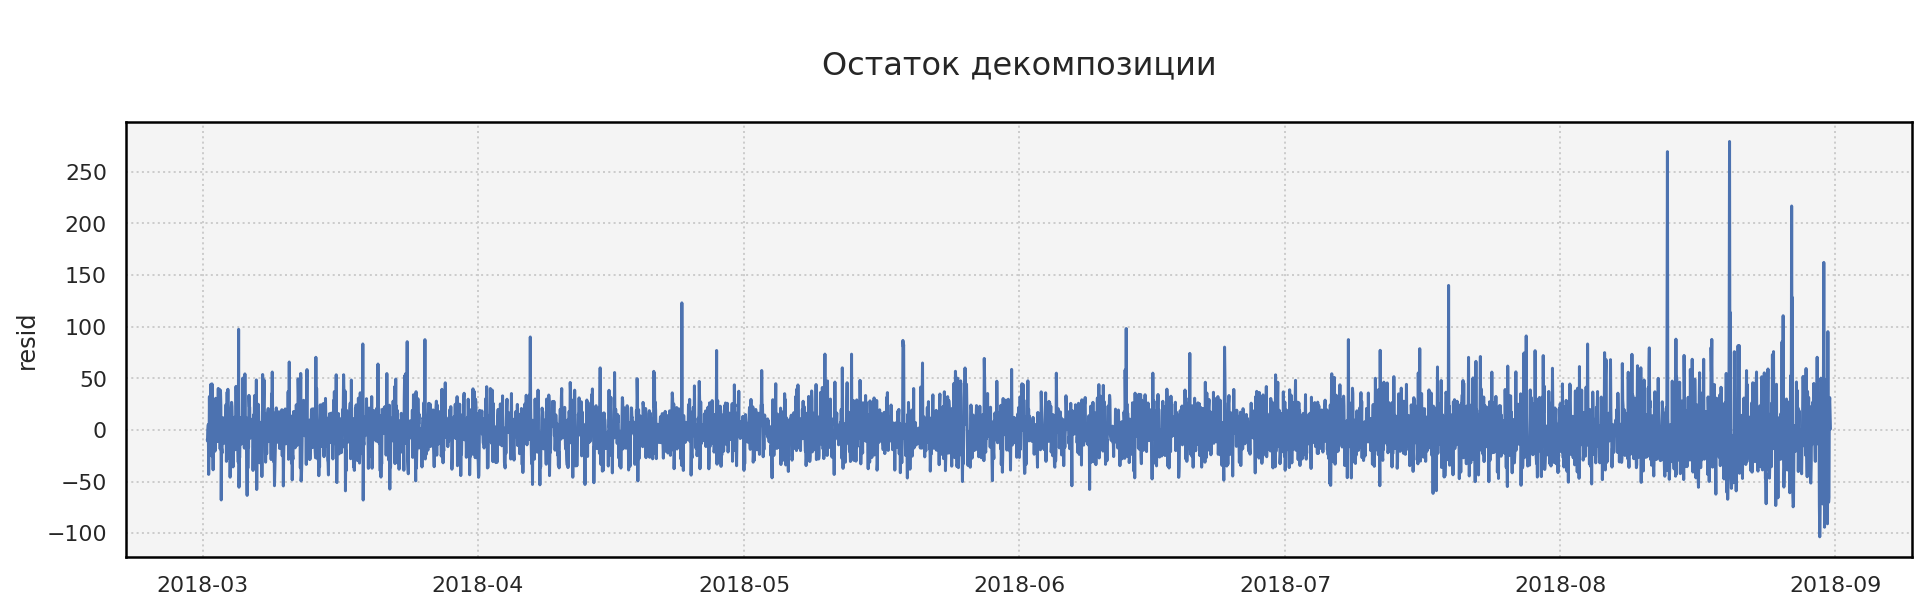

In [14]:
sns.lineplot(data=df)
plt.title('\nПочасовой временной ряд\n', fontsize=16)
plt.xlabel('')
plt.show()

sns.lineplot(data=decomposed.trend)
plt.title('\nТренд\n', fontsize=16)
plt.xlabel('')
plt.show()

sns.lineplot(data=decomposed.seasonal.head(24 * 7))
plt.title('\nСезонность в течении недели\n', fontsize=16)
plt.xlabel('')
plt.show()

sns.lineplot(data=decomposed.seasonal.head(24))
plt.title('\nСезонность в течении дня\n', fontsize=16)
plt.xlabel('')
plt.show()

sns.lineplot(data=decomposed.resid)
plt.title('\nОстаток декомпозиции\n', fontsize=16)
plt.xlabel('')
plt.show()

### Выводы:<a class="tocSkip">

- Общий тренд показывает рост количества заказов со временем.
- В течении суток наблюдается сезонность. К 6-ти часам утра происходит спад, вечером количество заказов плавно растет и к 12-ти часам ночи достигает своего пика.
- Остаточная (случайная) часть декомпозиции имеет постоянное среднее значение с периодическими всплесками, возможно вызванными повышением спроса на такси по выходным и праздничным дням. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что сезонность рассмотренна на различных временных интервалах.</font>

## Подготовка признаков

In [15]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    data['is_weekend'] = data.index.dayofweek.isin([5, 6]).astype(int)
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Хороший выбор признаков! :<br>
<font color='darkorange'>1) Признак день: НЕ очень информативный, у нас нет сезонности внутри месяца, будет просто последовательность чисел.<br></font>
<font color='green'>
2) Признак день недели: ДА, т.к. у нас есть недельная сезонность.<br>
3) Признак выходного дня: ДА, подтверждение недельной сезонности.<br>
4) Признак час: ДА, т.к. есть часовая (суточная) сезонность.<br>
5) Признак lag: ДА, это параметр авторегрессии - учёт влияния вчерашних событий на сегодняшние.<br>
6) Признак rolling: ДА, это аналог тренда. Чем больше окно сглаживания, тем ровнее линия тренда <br></font>

<font color='purple'><b>Комментарий студента</b></font>: 
Убрал день из признаков

In [16]:
make_features(df, 24 * 7, 12) 

In [17]:
df = df.dropna().astype(int)

In [18]:
X = df.drop('num_orders', axis=1)
y = df['num_orders']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что запрещаешь перемешивание отчётов.</font>

## Обучение

In [19]:
def rmse(y, predictions):
    return mse(y, predictions) ** 0.5

In [20]:
rmse_score = make_scorer(rmse, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Для кроссвалидации есть готовая метрика 'neg_root_mean_squared_error'. Метрики можно выбирать [здесь](https://scikit-learn.org/stable/modules/model_evaluation.html) </font>

In [21]:
cv = TimeSeriesSplit(n_splits=5)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Верно, что применяешь TimeSeriesSplit для кроссвалидации временных рядов.</font>

### LinearRegression

In [22]:
%%time

score = -(cross_val_score(LinearRegression(), X_train, y_train, scoring=rmse_score, cv=cv, n_jobs=-1).mean())

print()
print('Среднее значение RMSE: {:.2f}'.format(score))
print()


Среднее значение RMSE: 22.61

CPU times: user 503 ms, sys: 1.09 s, total: 1.59 s
Wall time: 1.52 s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово что оценка кроссвалидацией.</font>

### LGBMRegressor

In [24]:
X_train_boost, X_test_boost = X_train.copy(), X_test.copy()
X_train_boost[['hour', 'dayofweek', 'is_weekend']] = X_train_boost[['hour', 'dayofweek', 'is_weekend']].astype('category')
X_test_boost[['hour', 'dayofweek', 'is_weekend']] = X_test_boost[['hour', 'dayofweek', 'is_weekend']].astype('category')

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично, что используешь алгоритмы LGBM для категориальных признаков.</font>

In [25]:
CAT_COLUMNS = X_train_boost.select_dtypes(exclude='number').columns.tolist()
CAT_INDICES = [X_train_boost.columns.get_loc(i) for i in CAT_COLUMNS]

In [26]:
param = {
    'n_estimators': range(25, 101, 5),
    'learning_rate': np.arange(0.1, 1, 0.1),
    'max_depth': range(2, 16)
}

In [27]:
%%time

lgbm = RandomizedSearchCV(
    LGBMRegressor(random_state=SEED),
    param, scoring=rmse_score, n_jobs=-1, cv=cv, n_iter=10, random_state=SEED)
lgbm.fit(X_train_boost, y_train, eval_metric='rmse')

print()
print('Лучшее значение RMSE: {:.2f}'.format(-lgbm.best_score_))
print('Лучшие Параметры:', lgbm.best_params_)
print()


Лучшее значение RMSE: 23.60
Лучшие Параметры: {'n_estimators': 30, 'max_depth': 10, 'learning_rate': 0.1}

CPU times: user 1min 27s, sys: 275 ms, total: 1min 27s
Wall time: 1min 28s


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно.</font>

## Тестирование

In [28]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_test), index=y_test.index).astype(int)

print()
print('RMSE модели LinearRegression на тестовой выборке: {:.2f}'.format(rmse(y_test, y_pred)))
print()


RMSE модели LinearRegression на тестовой выборке: 34.21



<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

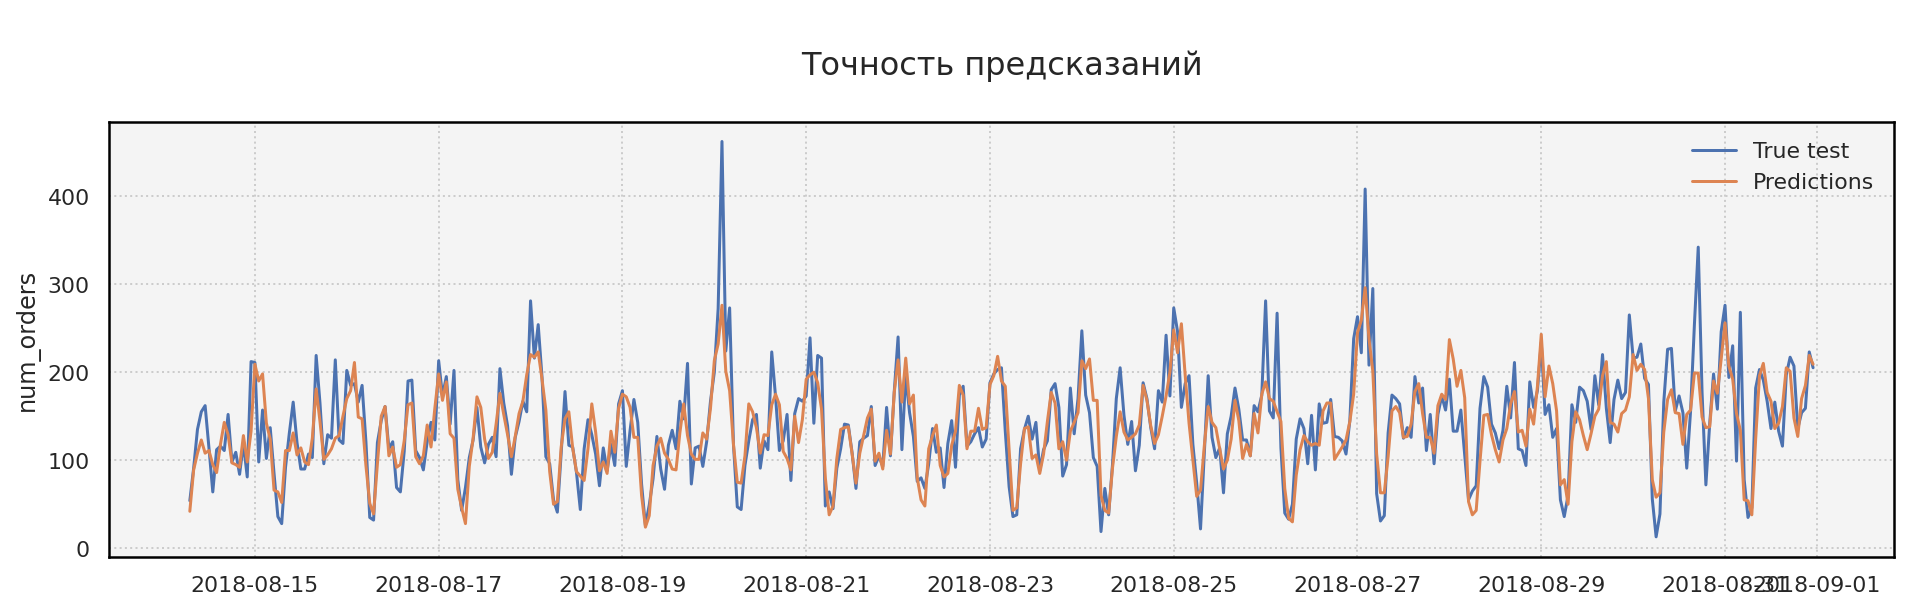

In [29]:
sns.lineplot(data=y_test, label='True test')
sns.lineplot(data=y_pred, label='Predictions')
plt.title('\nТочность предсказаний\n', fontsize=16)
plt.xlabel('')
plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово, что выводишь графики прогноза и реальных данных! Это один из важнейших инструментов анализа результатов моделирования временных рядов, чтобы увидеть где основные не "попадалки" модели.\
Лучше выбрать масштаб, скажем, несколько дней, чтобы увидеть можо было и сравнить каждый час.</font>

## Выводы

- Лучший результат RMSE (22.61) на обучающей выборке показала модель LinearRegression.  
- RMSE линейной регрессии на тестовой выборке - 34.21  
- На сравнительном графике полученная модель достаточно хорошо попадает в истинные значения, не учитывая локальные пики.
- Точность модели можно улучшить подобрав оптимальный размер лага и окна для скользящего среднего, а также добавив скользящее стандартное отклонение. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера </b></font> \
<font color='green'>Юрий, хороший проект получился! Большое спасибо за проделанную работу. Видно, что приложено много усилий. Полностью описан ход решения, даны все необходимые пояснения, выводы полные и логичные. 

<font color='green'><b>Работа уже может быть зачтена</b>, отправляю обратно, чтобы была возможность задать вопросы если они есть  ))).</font>

<font color='green'>Дополнительные материалы:\
Е.Рябенко - Прогнозирование временных рядов https://www.youtube.com/watch?v=u433nrxdf5k \
Б.Б. Демешев - временные ряды https://disk.yandex.ru/i/LiDHB-B3A6Lz5A \
Канторович - Анализ временных рядов https://yadi.sk/i/IOkUOS3hTXf3gg \

Базовое применение ARIMA - https://colab.research.google.com/drive/17RnG91Eq8JBKyxToNzvCvjibfxum-oPj?usp=sharing \
Prophet модель от известной компании https://facebook.github.io/prophet/ \
https://facebook.github.io/prophet/docs/quick_start.html#python-api \
https://nbviewer.jupyter.org/github/miptgirl/habra_materials/blob/master/prophet/habra_data.ipynb
</font> 

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48